# Proyecto Matematicas Discretas 2
## Nicolas Raul Rojas Feria

## Introducción

In [ ]:
'''primero de penso en el pdf 417, pero este al ser ya realizado por una libreria , 
se decidio a hacer el encode y decode de alguno que no cuente con una libreria 
para el proyecto como lo es el pharmacode one track y two track'''

from pdf417 import encode, render_image, render_svg

# texto a encode
text = "este es el texto a pasar a pdf 417"

#print(type(text))
# conversion
codes = encode(text)

# Pasado a png
image = render_image(codes)  
image.save('pdf417.png')

Este proyecto consiste en codificar y decodificar un barcode, en este caso se aplico con el Pharmaceutical One-Track y el Pharmaceutical Two-Track (creando las imagenes del barcode asi como decodificando imagenes del barcode, ello apoyandose en librerias como openCV y numpy) con cualquier numero que se quiera representar, y luego ver una aplicacion util en una base de datos (MongoDB en este caso de manera local)

## Numero de combinaciones: 
Se va a determinar el numero de combinaciones con respecto a las posiciones que ocuper el barcode, en este caso tanto el one-track como el  two-track 

\begin{equation*}
K=\sum_{n=1}^{n} 2^{n}
\end{equation*}


Para la parte de programa

In [ ]:
from plot import plot 
def combinacionesonetrack(n, count,listx,listy): 
    count+=1
    listx.append(count)
    if(n==1):
        listy.append(2)
        listy.reverse()
        plot(listx,listy)
        return 2
    else: 
        listy.append(2**n)
        return (2**n)+combinacionesonetrack(n-1,count,listx,listy)

x = int(input("Digite un numero de posiciones(esto es con respecto al barcode, para pharmacode one tracks: "))

print(combinacionesonetrack(x,0,[],[]))

21267647932558653966460912964485513214


En la grafica podemos denotar el crecimiento de la sumatoria en cada iteracion para pharmacode one-track

\begin{equation*}
K=\sum_{n=1}^{n} 3^{n}
\end{equation*}

In [ ]:
# Number of Possible combinations
from plot import plot
def combinacionestwotracks(n,count,listx,listy): 
  count+=1 
  listx.append(count)
  if(n==1):
    listy.append(3)
    listy.reverse()
    plot(listx,listy)
    return 3
  else: 
    listy.append(3**n)
    return (3**n)+combinacionestwotracks(n-1,count,listx,listy)

x = int(input("Digite un numero de posiciones(esto es con respecto al barcode, para pharmacode two tracks): "))

print(combinacionestwotracks(x,0,[],[]))


797160


En la grafica podemos denotar el crecimiento de la sumatoria en cada iteracion para pharmacode two track

## Aclaracion: 
El One-track pharmacode ni el two-track Pharmacode se tratan de una conversion de decimal a bnario o terciario, se va a hacer un terciario solo para ver que son muy diferentes

Decimal to  Thernary (No es el de Pharmacode two tracks) se va a poner por simple aclaracion, al igual q el one track no es a binario




In [ ]:
import numpy as np

def decimalToTernary(decimal):
  ternary=np.base_repr(decimal,base=3)
  return list(map(int,ternary))

a=int(input())
b=decimalToTernary(a)
print(b)

print()

matriz = []
for i in range(2): 
  matriz.append([])
  for j in b: 
    if (i==0): 
      if(j==1):
        matriz[i].append(" ")
      else: 
        matriz[i].append("|")
    else: 
      if(j==2): 
        matriz[i].append(" ")
      else: 
        matriz[i].append("|")

for i in range(2): 
  for j in range(len(b)): 
    print(matriz[i][j],end="")
  print()

[1, 1, 1, 2, 0]

   ||
||| |


##Por Consola (Codificacion): 
Vamos a hacer la conversion mostrandolo por sonsola para ver el ejemplo en este caso con el 123456, aunque se púede modificar al que se quiera, tanto para One-Track Pharmacode como para Two-Track P´harmacode

Codificacion por consola de One-Track Pharmacode

Algoritmo usado (Representado como diagrama de estados):

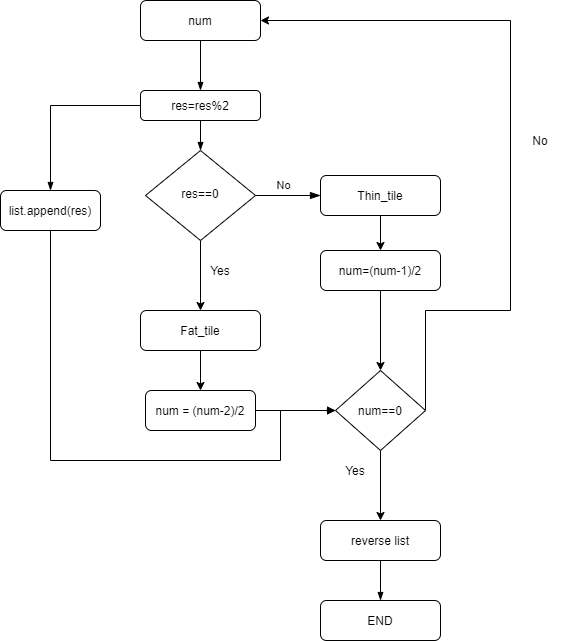

In [ ]:
pharmacode1 = []

def examplePharmacodeOne(num): 
    rest = num%2 
    pharmacode1.append(int(rest))
    if(rest==0): 
        num = (num-2)/2
        if(num!=0):
            examplePharmacodeOne(num)
        else:
            return 
    else:
        num = (num-1)/2
        if(num!=0):
            examplePharmacodeOne(num)
        else:
            return 
num = 123456
examplePharmacodeOne(num)
pharmacode1=pharmacode1[::-1]  # reverse
print(pharmacode1)

print()

matriz = []

for i in pharmacode1:
    if(i==0):
        matriz.append("|| ")
    else:
        matriz.append("| ")

for i in range(len(pharmacode1)): 
    print(matriz[i],end=" ")

[0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]

||  ||  ||  |  |  |  ||  |  |  ||  |  |  |  |  |  ||  

Codificacion por consola de Two-Track Pharmacode

Algoritmo usado (Representado como diagrama de estados)

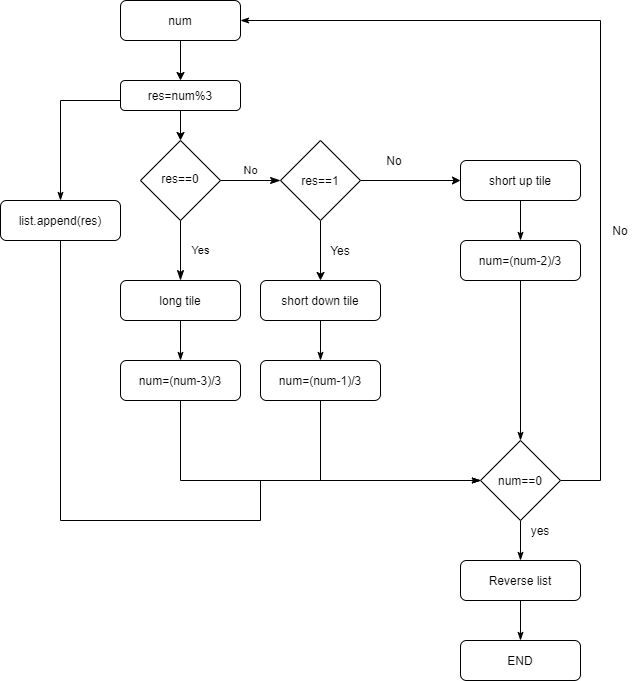

In [ ]:


listaGeneral= []

# se hace una lista de numeros modulo 3 con respecto al diagrama planteado
def prueba1(num): 
  rest=num%3
  listaGeneral.append(int(rest))
  if(rest==0):
    #print(int(rest))
    num=(num-3)/3
    if(num!=0):
      prueba1(num) 
    else: 
      return 
  elif(rest==1):
    #print(int(rest))
    num=(num-1)/3
    if(num!=0):
      prueba1(num)
    else:
      return 
  else: 
    #print(int(rest))
    num=(num-2)/3
    if(num!=0):
      prueba1(num)
    else:
      return 
    

num = 123456
prueba1(num)
listaGeneral=listaGeneral[::-1]  # reverse
print(listaGeneral)

print()

matriz = []
for i in range(2): 
  matriz.append([])
  for j in listaGeneral: 
    if (i==0): 
      if(j==1):
        matriz[i].append(" ")
      else: 
        matriz[i].append("|")
    else: 
      if(j==2): 
        matriz[i].append(" ")
      else: 
        matriz[i].append("|")

for i in range(2): 
  for j in range(len(listaGeneral)): 
    print(matriz[i][j],end="")
  print()


[1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0]

 || |||||||
| ||||  |||


## Codificacion Completa
Para la codificacion se va a hacer una concatenacion de imagenes (tiles) que por la libreria de numpy y opencv se van a representar como matrices lo cual facilitara las operaciones entre ellas

Codificacion Completa: One-Track Pharmacode, las imagenes se van a concatenar tomando como base la codificacion por consola, el archivo con la imagen del barcode se van a crear o actualizar en el archivo 
- 'assets/one_track/one_track_generated.png'

Tiles Usados:

Fat Tile:
fat.png

Space Tile: spaceOne.png

Thin Tile: thin.png

In [ ]:
import cv2
import numpy as np

encodeOneList= []

# se hace una lista de numeros modulo 3 con respecto al diagrama planteado
def encodePharmacodeOne(num): 
  rest=num%2
  if(rest==0):
    encodeOneList.append(int(rest))
    #print(int(rest))
    num=(num-2)/2
    if(num!=0):
      encodePharmacodeOne(num) 
    else: 
      return 
  else:
    encodeOneList.append(int(rest))
    #print(int(rest))
    num=(num-1)/2
    if(num!=0):
      encodePharmacodeOne(num)
    else:
      return 

_spaceOne = cv2.imread('assets/one_track/spaceOne.png')
_fat = cv2.imread('assets/one_track/fat.png')
_thin = cv2.imread('assets/one_track/thin.png')
#im_v = cv2.vconcat([im1, im1])
#cv2.imwrite('data/dst/opencv_vconcat.jpg', im_v)

img_list = [_spaceOne]


encodePharmacodeOne(int(input("digite numero a codificar: ")))
encodeOneList= encodeOneList[::-1] # reverse 

# Se pasa a imagen, concatenando los tiles definidos
for i in encodeOneList:
    if i==0: 
        img_list.append(_fat)
        img_list.append(_spaceOne)
    else: 
        img_list.append(_thin)
        img_list.append(_spaceOne)

#concatenacion horizontal de las matrices(imagenes)
barcodeOneTrack = cv2.hconcat(img_list)

#lo escribe en el caso de que no exista, en caso de que si lo sobreescribe
cv2.imwrite('assets/one_track/one_track_generated.png', barcodeOneTrack)

True

Resultado para entrada 123456: 
one_track_generated.png

Codificacion Completa: One-Track Pharmacode, las imagenes se van a concatenar tomando como base la codificacion por consola, el archivo con la imagen del barcode se van a crear o actualizar en el archivo 
- 'assets/two_tracks/two_tracks_generated.png'

Tiles Usados:

Long Tile: long_tile.png

Short Tile Down: short_tile_down.png

Short Tile Up: short_tile_up.png

Space Tile: space_tile.png

In [ ]:
import cv2
import numpy as np

encodeList= []

# se hace una lista de numeros modulo 3 con respecto al diagrama planteado
def encode1(num): 
  rest=num%3
  if(rest==0):
    encodeList.append(int(rest))
    #print(int(rest))
    num=(num-3)/3
    if(num!=0):
      encode1(num) 
    else: 
      return 
  elif(rest==1):
    encodeList.append(int(rest))
    #print(int(rest))
    num=(num-1)/3
    if(num!=0):
      encode1(num)
    else:
      return 
  else: 
    encodeList.append(int(rest))
    #print(int(rest))
    num=(num-2)/3
    if(num!=0):
      encode1(num)
    else:
      return 


_space = cv2.imread('assets/two_tracks/space_tile.png')
_long = cv2.imread('assets/two_tracks/long_tile.png')
_short_up =cv2.imread('assets/two_tracks/short_tile_up.png')
_short_down =cv2.imread('assets/two_tracks/short_tile_down.png')
#im_v = cv2.vconcat([im1, im1])
#cv2.imwrite('data/dst/opencv_vconcat.jpg', im_v)

img_list = [_space]


encode1(int(input("digite numero a codificer: ")))
encodeList= encodeList[::-1] # reverse 

# Se pasa a imagen, concatenando los tiles definidos
for i in encodeList:
    if i==0: 
        img_list.append(_long)
        img_list.append(_space)
    elif i==1: 
        img_list.append(_short_down)
        img_list.append(_space)
    else: 
        img_list.append(_short_up)
        img_list.append(_space)

#concatenacion horizontal de las matrices(imagenes)
barcode = cv2.hconcat(img_list)

#lo escribe en el caso de que no exista, en caso de que si lo sobreescribe
cv2.imwrite('assets/two_tracks/two_tracks_generated.png', barcode)


True

Resultado para entrada 123456: two_tracks_generated.png

## Aclaracion: 
Existe la libreria pyzbar, pero no se puede usar debido a que los barcodeusados no se encuantran en las que esta decodifica, los barcode que se escogieron no estan dentro de las que se codifica en esta libreria

In [ ]:
 
'''
from pyzbar.pyzbar import decode
from PIL import Image
decode(Image.open('assets/barcode_generated.png'))
'''

[]

## Decodificacion Completa: 

En este caso vamos a decodificar lo que es el One-Track decodificacion, esto tiene dos partes, una primera encontrando los tiles para darles un numero correspondiente, para luego invertirlos y con ello mediante una ecuacion poder determinar el valor numerico total, siendo esta la decodificacion completa del ejercicio

En este caso la codificacion se puede hacer haciendo sucesiones para los casos del tile que se este leyendo (luego de que estos se representen como una lista de numeros como el de la codificacion) y sumarlas para obtener la representacion decimal del pharmacode

En el caso del One Track: 

Tenemos las siguientes sucesiones: 
- $1,2,4,8,16 ...$ , no es dificil ver que representa (i comenzando en 0):
\begin{equation*}
{2}^{i}
\end{equation*}
- $2,4,8,16,32 ...$, no es dificil ver que representa(i comenzando en 0): \begin{equation*}
{2}^{i+1}
\end{equation*}
- Lo anterior se suma en cada posicion de la lista luego de hacerle reverse (dependiendo de la representacion)

In [ ]:
# decode para One tack: 

def oneTrackToNumber(oneTrackPharmacode): 
    lista_one_track = [] 
    height, width = oneTrackPharmacode.shape[:2]
    #print(width)
    i=4
    while(i<=(width-4)): 
        # en estos casos el fat opupa 6 de ancho
        if(np.array_equal(_fat,oneTrackPharmacode[0:height, i:(i+6)])):
            lista_one_track.append(0)
            i+=6 
            #print(i)
        #el blanco ocupa 4 espacios
        elif(np.array_equal(_spaceOne,oneTrackPharmacode[0:height, i:(i+4)])):
            i+=4 
            #print(i)
        #el thin ocupa 2 espacios
        else:
            lista_one_track.append(1)
            i+=2
            #print(i)
    return(lista_one_track)

def decodeOneTrack(numericOneTrack):
    numericOneTrack = numericOneTrack[::-1]
    sum=0
    for i in range(len(numericOneTrack)): 
        if(numericOneTrack[i]==0): 
            #para el caso fat
            sum+=(2**(i+1))
        else:
            #para el caso thin
            sum+=(2**(i))
    return sum
numericOneTrack = oneTrackToNumber(barcodeOneTrack)
one_track_decode=decodeOneTrack(numericOneTrack)
print(numericOneTrack)
print(one_track_decode)



[0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]
123456


En este caso vamos a decodificar lo que es el Two-Track decodificacion, esto tiene dos partes, una primera encontrando los tiles para darles un numero correspondiente, para luego invertirlos y con ello mediante una ecuacion poder determinar el valor numerico total, siendo esta la decodificacion completa del ejercicio

En el caso del Two Track: 

Tenemos las siguientes sucesiones: 
- $3,9,27,81 ...$ , no es dificil ver que representa (i comenzando en 0) 
\begin{equation*}
{3}^{i+1}
\end{equation*}
- $1,3,9,27,81 ...$, no es dificil ver que representa(i comenzando en 0): \begin{equation*}
{3}^{i}
\end{equation*}
- $2,6,18,54 ...$, Para deducirlo (teniendo en cuanta que i comienza en 0):
- Vemos que la secuencia es geometrica con $r=3$
- Representada como:
 \begin{equation*}
{a}_{n}=a\cdot{r}^{i+1}
\end{equation*}
- Finalmente tenemos ya r y $a$ lo podemos reemplazar como:
 \begin{equation*}
{a}_{n}=2\cdot{3}^{i}
\end{equation*}

- Lo anterior se suma en cada posicion de la lista luego de hacerle reverse (dependiendo de la representacion)

In [ ]:

'''
height,width=barcode.shape[:2] 
print (height,width)
start_row, start_col = int(0), int(0) 
end_row, end_col = int(height * .5), width


cada uno de los tiles es de 4 de ancho y 20 de alto, en este caso este seria un recortado de la imagen realizada 
en este caso este va a ser igual al tile _space
cropped_top = barcode[0:20 , 0:4] 

#lo podemos escribir en example para verificar
cv2.imwrite('assets/example.png', cropped_top)
print(np.array_equal(cropped_top,_long))
'''
def toNumberList(pharmacode):
    lista_barcode=[]
    height, width = pharmacode.shape[:2]

    amount_column=int(width/4)
   
    width_actual=0
    for i in range(amount_column): 
        if(i%2==0):
            width_actual = width_actual+4
        else: 
            recorte = pharmacode[0:height,width_actual:(width_actual+4)]
            if np.array_equal(recorte,_short_up):
                lista_barcode.append(2)
                #print(2)
                #print(width_actual,width_actual+4)
            elif  np.array_equal(recorte,_short_down): 
                lista_barcode.append(1)
                #print(2)
                #print(width_actual,width_actual+4)
            else: 
                lista_barcode.append(0)
                #print(2)
                #print(width_actual,width_actual+4)
            width_actual = width_actual+4
    return(lista_barcode)

def decode(numeric_list):
    numeric_list = numeric_list[::-1]
    sum=0
    for i in range(len(numeric_list)): 
        if(numeric_list[i]==0): 
            #case for long
            sum+=(3**(i+1))
        elif(numeric_list[i]==1): 
            #case for short up
            sum+=(3**(i))
        else: 
            #case for short down
            sum+=(2*(3**(i)))
    return sum

numeric_list = toNumberList(barcode)
num_decode=decode(numeric_list)
print(num_decode)


532


## Correspondencia en producto de la base de datos de productos farmaceuticos

Par ello vamos a crear una base de datos de mongo desde python con la libreria pymongo, en la cual vamos a poner algunos productos que tienen un ID, Comparando si algun producto coincide con el decodificado de tanto One-Track como Two-Track, dicha decodificacion se supone que son ids de un producto

Primero que todo para la correcta realizacion de esta parte, se necesita que se tenga mongodb instalado, y tener el daemon mongod en funcionamiento

In [ ]:
# Es necesario tener abierto el Daemon de Mongo

import pymongo
from pymongo  import MongoClient 

#127.0.0.1 = localhost
mongoClient =  MongoClient('127.0.0.1', port = 27017) 

print(mongoClient.list_database_names())

['admin', 'concesionario', 'config', 'local', 'shop', 'test', 'tiendaVirtual']


Asegurarse de no tener una base de datos con el mismo nombre para no tener conflictos con los datos a ingresar

In [ ]:
#Creacion de la base de datos 

miDb = mongoClient.decoder 
#Creacion de la coleccion
miCol = miDb.pharmacode_two 

#Lista de productos
productos = [
  { "_id": 112131,  "nombre": "Aspirina","tipo":"Pastilla", "precio" : 15000},
  { "_id": 532,  "nombre": "Micotopic","tipo":"Crema topica", "precio" : 5000},
  { "_id": 6212,  "nombre": "Bactoderm","tipo":"Crema topica", "precio" : 35000},
  { "_id": 29891,  "nombre": "oscillococcinum","tipo":"homeopatico", "precio" : 35000},
  { "_id": 783816,  "nombre": "Afrin","tipo":"solucion", "precio" : 35000}
]


x = miCol.insert_many(productos)
print(x.inserted_ids)

[112131, 532, 6212, 29891, 783816]


Se va a buscar (Find) si existe algun id en la base de datos que coincida con el numero resultante de la decodificacion tanto para One-Track como para Two-track

In [ ]:
#Verificacion del One-Track Pharmacode

miDoc = miCol.find_one({"_id":one_track_decode})
#print(type(miDoc))

if (miDoc==None): 
    print("Articulo no registrado")
else: 
    print(miDoc)

#Verificacion del Two-track Pharmacode

miDoc = miCol.find_one({"_id":num_decode})
#print(type(miDoc))

if (miDoc==None): 
    print("Articulo no registrado")
else: 
    print(miDoc)




{'_id': 532, 'nombre': 'Micotopic', 'tipo': 'Crema topica', 'precio': 5000}
Articulo no registrado


Luego de realizar el proceso se va a realizar una eliminacion de la coleccion creada

In [ ]:
miCol.drop()

## Conclusion

Este procedimiento tiene una gran facilidad para pasar las imagenes creadas para implementar en productos farmaceuticos , tanto para la creacion desde una base de datos como para revisar si existen en la base de datos (esto ultimo se realizo con las imagenes creadas tanto de One Track, como del Two Track). 
El procedimiento de decodificacion tambien resulta util ya que las medidas de estos bercode estan estandarizados con repecto a sus medidas, asi que identificando los tiles con un video se puede realizar un procedimiento similar al aplicado (que fue con imagenes). Finalmente todo lo realizado es un ejemplo de conceptos de teoria de numeros tanto en la parte modular como en la parte de codificacion y decodificacion

##Referencias 

- http://www.gomaro.ch/ftproot/Laetus_PHARMA-CODE.pdf 
- https://barcode.tec-it.com/en/ 
- https://pypi.org/project/opencv-python/ 
- https://pymongo.readthedocs.io/en/stable/
- https://drive.google.com/file/d/1EQ0FxsZNcBO0651ULj9qAWPX41DuXnFt/view - Number Theory, The Open University 
- https://drive.google.com/file/d/1vZugWaH5IjT_NVLB97oii9aVFbvtWSet/view - Elementary Number theory with programming